In [5]:
import pandas as pd
# Load original datasets
dep = pd.read_csv('Desktop/5400/group project/depression_index.csv')
weather = pd.read_csv('Desktop/5400/group project/Weather_Data.csv')

# Convert date columns
dep['date'] = pd.to_datetime(dep['date'])
weather['Date'] = pd.to_datetime(weather['Date'])

# Create week start (Monday) for depression
dep['week'] = dep['date'] - pd.to_timedelta(dep['date'].dt.weekday, unit='D')

# Create week start for weather
weather['week'] = weather['Date'] - pd.to_timedelta(weather['Date'].dt.weekday, unit='D')

# Compute weekly mean weather
weather_weekly = weather.groupby('week').mean(numeric_only=True).reset_index()

# Merge on week
merged = pd.merge(dep, weather_weekly, on='week', how='left')

# Compute correlations
corr_series = merged.corr(numeric_only=True)['depression_index'].sort_values(ascending=False)

# Save merged table
output_path = 'Desktop/5400/group project/depression_weather_weekly_merged.csv'
merged.to_csv(output_path, index=False)

corr_series.head(20), output_path


(depression_index          1.000000
 Oregon_Rainfall           0.349094
 Washington_Rainfall       0.269410
 California_Rainfall       0.252310
 Utah_Rainfall             0.217730
 Idaho_Rainfall            0.158218
 Wyoming_Rainfall          0.149431
 Nevada_Rainfall           0.121333
 Alaska_Rainfall           0.102572
 Mississippi_Rainfall      0.100791
 Hawaii_Rainfall           0.097436
 Maine_Rainfall            0.077009
 Illinois_Rainfall         0.059159
 New Hampshire_Rainfall    0.056278
 Arkansas_Rainfall         0.052913
 Rhode Island_Rainfall     0.051836
 Virginia_Rainfall         0.049749
 Texas_Rainfall            0.048587
 Indiana_Rainfall          0.038767
 Massachusetts_Rainfall    0.034923
 Name: depression_index, dtype: float64,
 'Desktop/5400/group project/depression_weather_weekly_merged.csv')

In [6]:
# === Top 20 Rainfall Correlation Table ===

# 1. 找出所有 rainfall 变量
rain_cols = [c for c in merged.columns if "Rain" in c or "rain" in c]

# 2. 计算与 depression_index 的相关性
corr_rain = (
    merged[rain_cols + ['depression_index']]
    .corr()['depression_index']
    .sort_values(ascending=False)
)

# 3. 取前20名
top20 = corr_rain.head(20)

# 4. 输出漂亮的表格
top20_df = top20.reset_index()
top20_df.columns = ["Weather Variable", "Correlation"]

top20_df


,Weather Variable,Correlation
0,depression_index,1.000000
1,Oregon_Rainfall,0.349094
2,Washington_Rainfall,0.269410
3,California_Rainfall,0.252310
4,Utah_Rainfall,0.217730
5,Idaho_Rainfall,0.158218
6,Wyoming_Rainfall,0.149431
7,Nevada_Rainfall,0.121333
8,Alaska_Rainfall,0.102572
9,Mississippi_Rainfall,0.100791


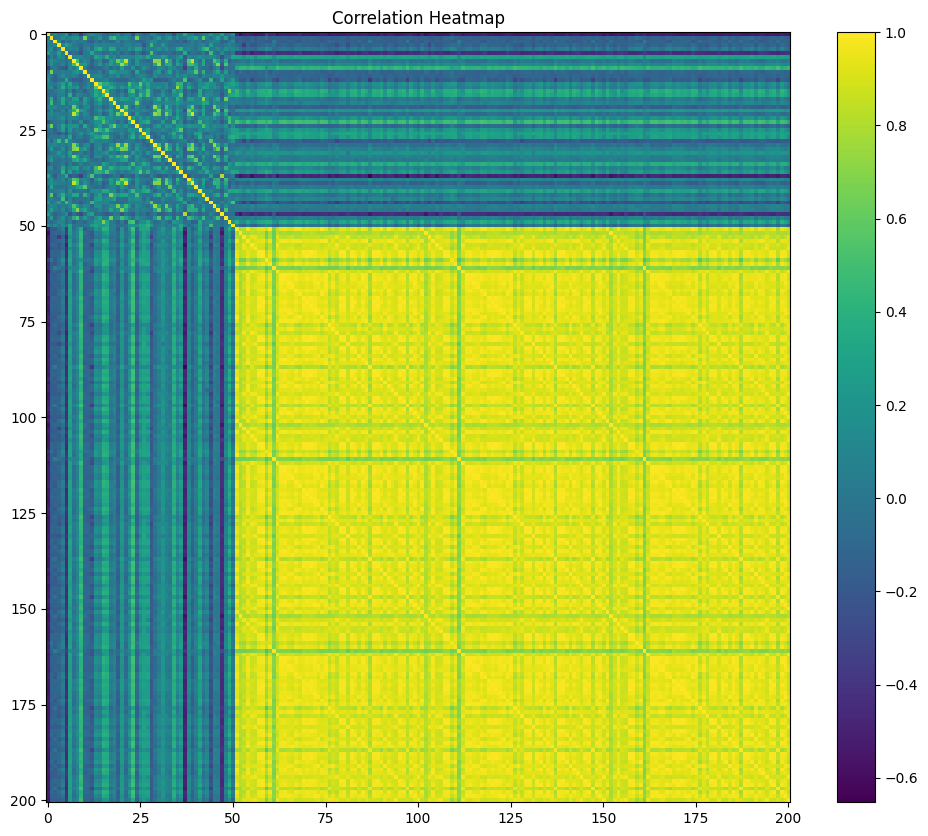

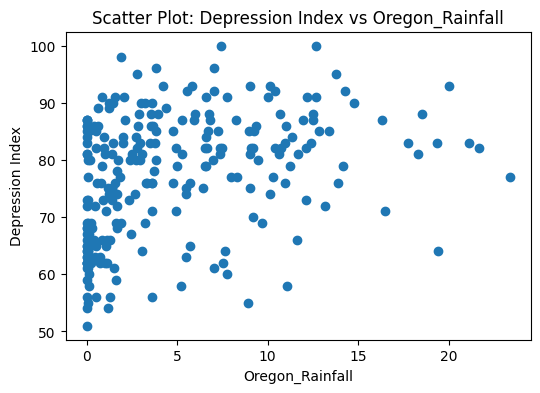

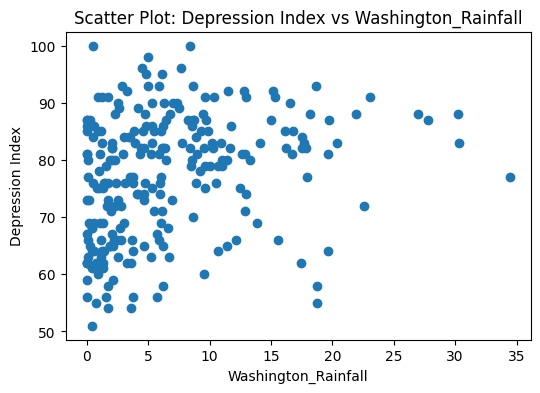

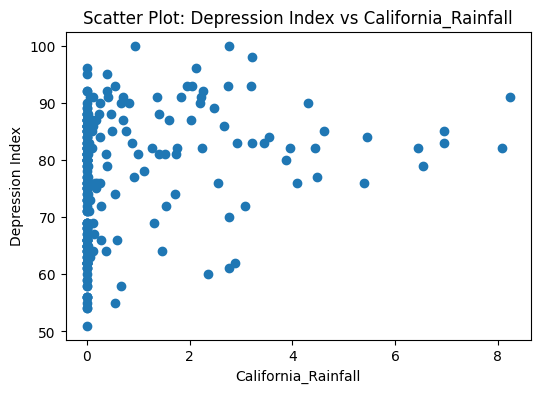

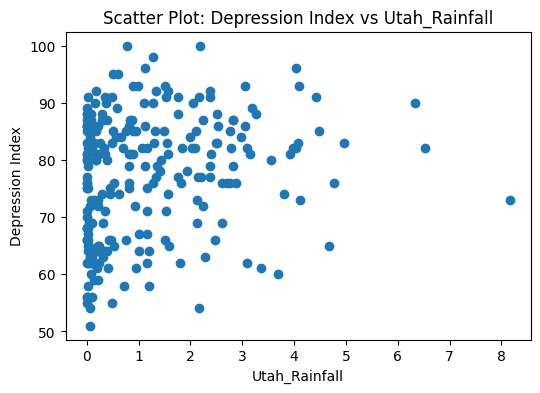

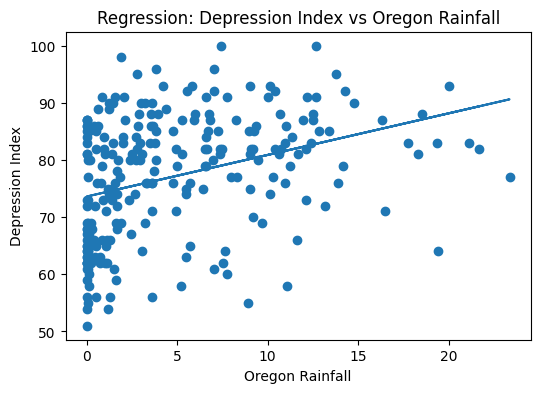

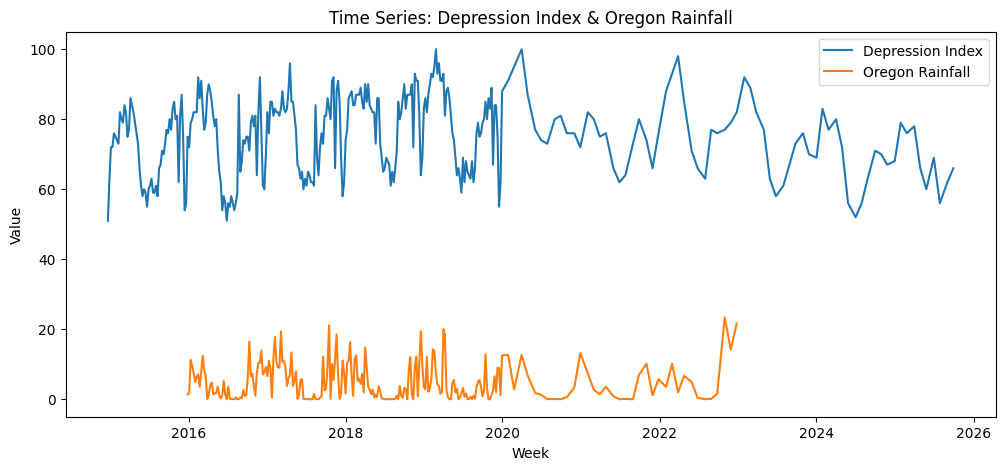

In [20]:
import pandas as pd

merged = pd.read_csv("Desktop/5400/group project/depression_weather_weekly_merged.csv")

temp_cols = [c for c in merged.columns if "Temp" in c or "temperature" in c.lower()]

corr_temp = (
    merged[temp_cols + ["depression_index"]]
    .corr()["depression_index"]
    .sort_values(ascending=False)
)

corr_temp

depression_index           1.000000
Florida_Temp_Max          -0.340635
Louisiana_Temp_Max        -0.448858
Hawaii_Temp_Max           -0.457334
South Carolina_Temp_Max   -0.459673
                             ...   
California_Temp_Min       -0.560250
Idaho_Temp_Max            -0.562295
Wyoming_Temp_Max          -0.570487
Alaska_Temp_Min           -0.576773
Alaska_Temp_Max           -0.596928
Name: depression_index, Length: 101, dtype: float64

Top Temperature Variables: ['Alaska_Temp_Max', 'Alaska_Temp_Min', 'Wyoming_Temp_Max', 'Idaho_Temp_Max']


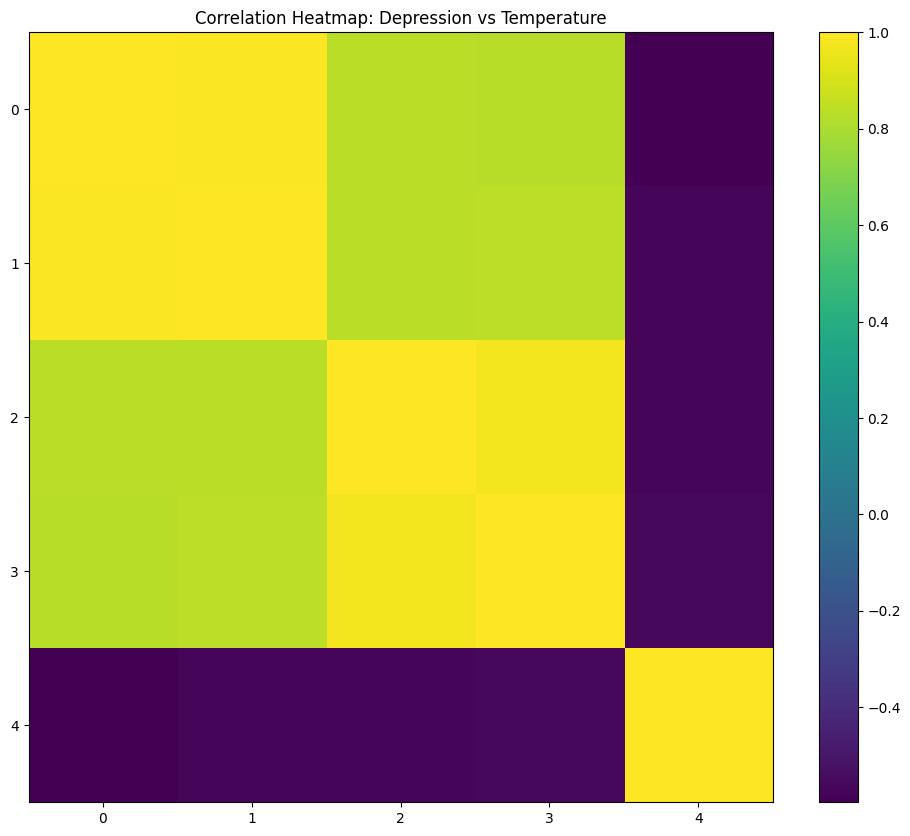

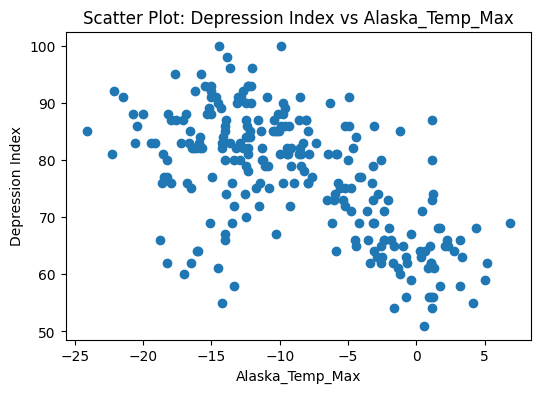

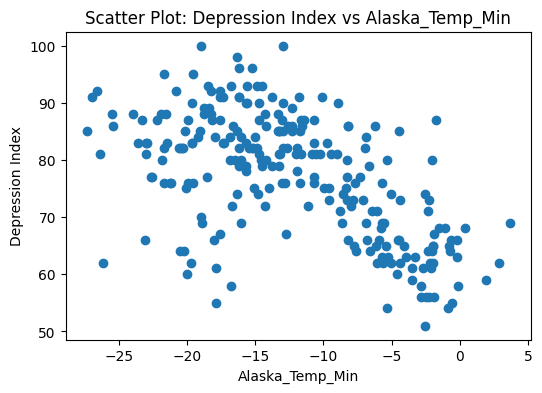

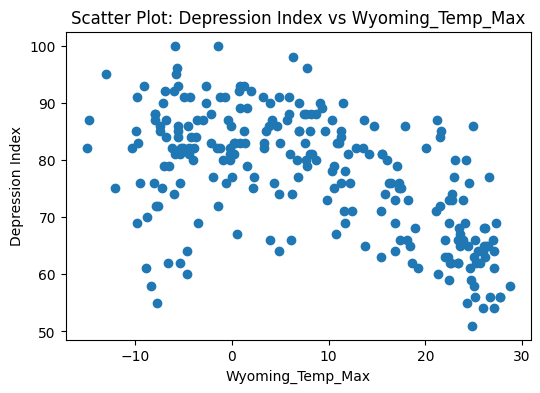

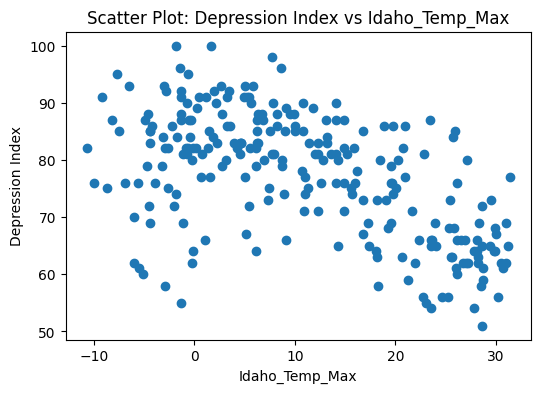

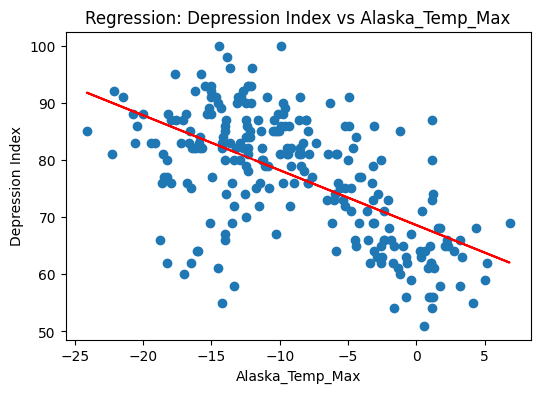

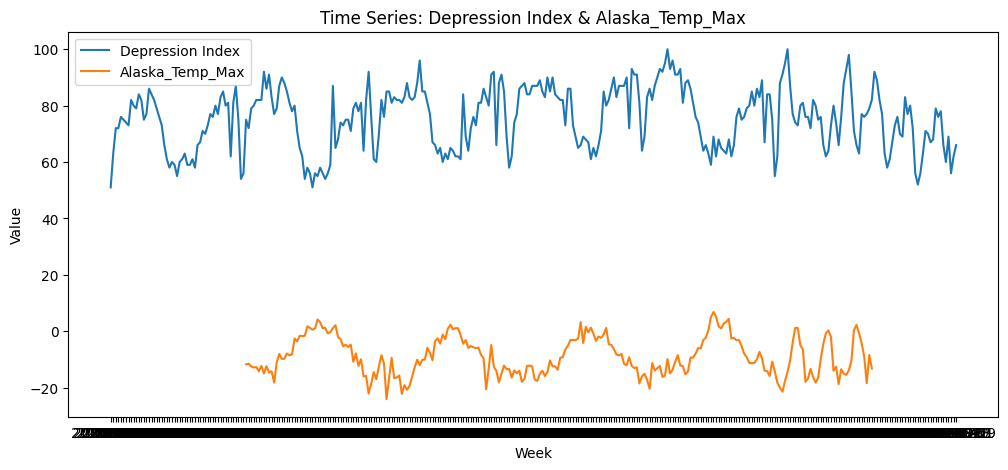

In [25]:
# ================================================================
#  Depression vs Temperature — FULL Visualization Code (One Block)
# ================================================================


# --- 1. Pick temperature columns ---
temp_cols = [c for c in merged.columns if "Temp" in c]

# --- 2. Compute correlation with depression index (absolute value sorted) ---
corr_temp = (
    merged[temp_cols + ["depression_index"]]
    .corr()["depression_index"]
    .sort_values(key=lambda s: abs(s), ascending=False)
)

# --- 3. Select TOP 4 temperature variables (same style as rainfall top4) ---
top_temp_vars = corr_temp.index[1:5]   # skip depression_index itself
print("Top Temperature Variables:", list(top_temp_vars))


# ------------------------------------------------
# 1. Correlation Heatmap (Temperature only)
# ------------------------------------------------
plt.figure(figsize=(12, 10))
corr_matrix = merged[list(top_temp_vars) + ["depression_index"]].corr()
plt.imshow(corr_matrix, aspect="auto")
plt.colorbar()
plt.title("Correlation Heatmap: Depression vs Temperature")
plt.savefig("Desktop/5400/group project/temp_corr_heatmap.png")
plt.show()
plt.close()


# ------------------------------------------------
# 2. Scatter plots (Dep vs each Top Temp variable)
# ------------------------------------------------
for v in top_temp_vars:
    plt.figure(figsize=(6, 4))
    plt.scatter(merged[v], merged["depression_index"])
    plt.xlabel(v)
    plt.ylabel("Depression Index")
    plt.title(f"Scatter Plot: Depression Index vs {v}")
    plt.savefig(f"Desktop/5400/group project/scatter_temp_{v}.png")
    plt.show()
    plt.close()


# ------------------------------------------------
# 3. Simple Regression (use #1 top temperature variable)
# ------------------------------------------------
temp_var = top_temp_vars[0]  # pick the strongest-correlated temperature var

x = merged[temp_var]
y = merged["depression_index"]

mask = ~np.isnan(x) & ~np.isnan(y)
x_clean = x[mask]
y_clean = y[mask]

coef = np.polyfit(x_clean, y_clean, 1)
poly1d_fn = np.poly1d(coef)

plt.figure(figsize=(6,4))
plt.scatter(x_clean, y_clean)
plt.plot(x_clean, poly1d_fn(x_clean), color="red")
plt.xlabel(temp_var)
plt.ylabel("Depression Index")
plt.title(f"Regression: Depression Index vs {temp_var}")
plt.savefig(f"Desktop/5400/group project/regression_temp_{temp_var}.png")
plt.show()
plt.close()


# ------------------------------------------------
# 4. Time Series Visualization
# ------------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(merged["week"], merged["depression_index"], label="Depression Index")
plt.plot(merged["week"], merged[temp_var], label=temp_var)
plt.legend()
plt.title(f"Time Series: Depression Index & {temp_var}")
plt.xlabel("Week")
plt.ylabel("Value")
plt.savefig(f"Desktop/5400/group project/time_series_temp_{temp_var}.png")
plt.show()
plt.close()



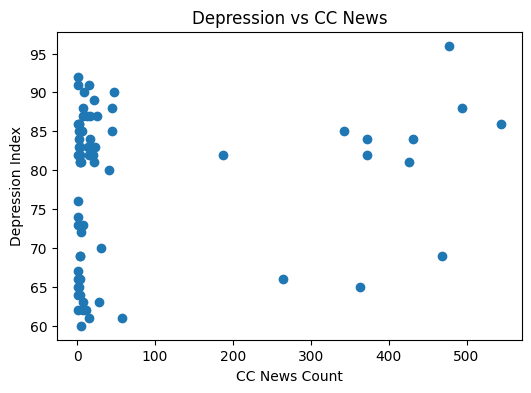

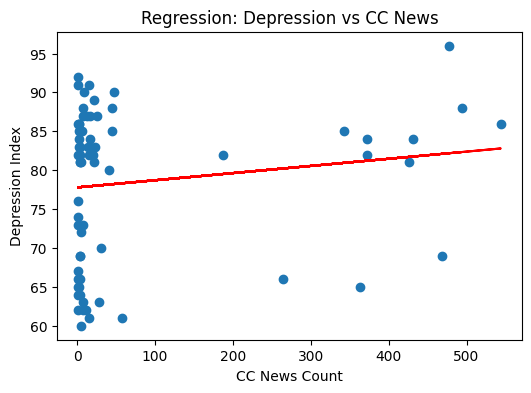

(depression_index              1.000000
 depression_word_count         0.140318
 total_articles                0.149780
 avg_depression_per_article    0.064633
 Name: depression_index, dtype: float64,
 'Desktop/5400/group project/dep_vs_ccnews_scatter.png',
 'Desktop/5400/group project/dep_vs_ccnews_regression.png')

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load datasets from Desktop folder
# -----------------------------
dep = pd.read_csv("Desktop/5400/group project/depression_index.csv")
cc = pd.read_csv("Desktop/5400/group project/ccnews_depression_daily_count_final.csv")

# Convert dates
dep['date'] = pd.to_datetime(dep['date'])
cc['date'] = pd.to_datetime(cc['date'])

# Convert both to weekly
dep['week'] = dep['date'] - pd.to_timedelta(dep['date'].dt.weekday, unit='D')
cc['week'] = cc['date'] - pd.to_timedelta(cc['date'].dt.weekday, unit='D')

# Aggregation
dep_weekly = dep.groupby('week')['depression_index'].mean().reset_index()
cc_weekly = cc.groupby('week').sum(numeric_only=True).reset_index()

# Merge
merged = dep_weekly.merge(cc_weekly, on='week', how='inner')

# Compute correlation
corr = merged['depression_index'].corr(merged['news_count']) \
       if 'news_count' in merged.columns else merged.corr(numeric_only=True)['depression_index']

# -----------------------------
# Scatter plot
# -----------------------------
plt.figure(figsize=(6,4))
plt.scatter(merged.iloc[:,2], merged['depression_index'])
plt.xlabel("CC News Count")
plt.ylabel("Depression Index")
plt.title("Depression vs CC News")

scatter_path = "Desktop/5400/group project/dep_vs_ccnews_scatter.png"
plt.savefig(scatter_path)
plt.show()
plt.close()

# -----------------------------
# Regression plot
# -----------------------------
x = merged.iloc[:,2].values
y = merged['depression_index'].values

mask = ~np.isnan(x) & ~np.isnan(y)
coef = np.polyfit(x[mask], y[mask], 1)
model = np.poly1d(coef)

plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.plot(x, model(x), color='red')
plt.xlabel("CC News Count")
plt.ylabel("Depression Index")
plt.title("Regression: Depression vs CC News")

reg_path = "Desktop/5400/group project/dep_vs_ccnews_regression.png"
plt.savefig(reg_path)
plt.show()
plt.close()

corr, scatter_path, reg_path


Temperature variable selected: Alabama_Temp_Max
CC News variable selected: depression_word_count


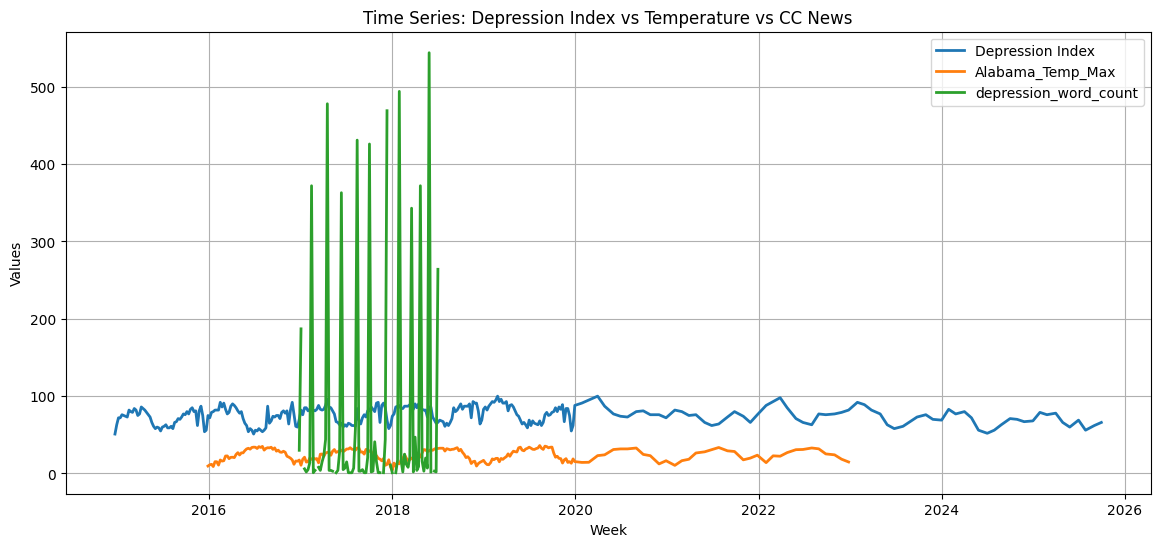

In [29]:
# ======================================================
# 1. Load datasets from Desktop folder
# ======================================================
dep = pd.read_csv("Desktop/5400/group project/depression_index.csv")
weather = pd.read_csv("Desktop/5400/group project/Weather_Data.csv")
cc = pd.read_csv("Desktop/5400/group project/ccnews_depression_daily_count_final.csv")

# Convert dates
dep['date'] = pd.to_datetime(dep['date'])
weather['Date'] = pd.to_datetime(weather['Date'])
cc['date'] = pd.to_datetime(cc['date'])

# Convert to weekly keys (Monday as week start)
dep['week'] = dep['date'] - pd.to_timedelta(dep['date'].dt.weekday, unit='D')
weather['week'] = weather['Date'] - pd.to_timedelta(weather['Date'].dt.weekday, unit='D')
cc['week'] = cc['date'] - pd.to_timedelta(cc['date'].dt.weekday, unit='D')

# ======================================================
# 2. Weekly aggregation
# ======================================================
dep_weekly = dep.groupby('week')['depression_index'].mean().reset_index()
weather_weekly = weather.groupby('week').mean(numeric_only=True).reset_index()
cc_weekly = cc.groupby('week').sum(numeric_only=True).reset_index()

# ======================================================
# 3. Merge into one full dataset
# ======================================================
merged = dep_weekly.merge(weather_weekly, on='week', how='left').merge(cc_weekly, on='week', how='left')

# Pick variables to plot
# Temp: pick the most correlated one, e.g. Alaska_Temp_Max
temp_var = [c for c in merged.columns if "Temp" in c][0]  

# CC News: choose the correct column
cc_var = [c for c in merged.columns if "count" in c or "article" in c][0]

print("Temperature variable selected:", temp_var)
print("CC News variable selected:", cc_var)

# ======================================================
# 4. Plot: Time Series of 3 Factors
# ======================================================
plt.figure(figsize=(14, 6))

plt.plot(merged["week"], merged["depression_index"], label="Depression Index", linewidth=2)
plt.plot(merged["week"], merged[temp_var], label=temp_var, linewidth=2)
plt.plot(merged["week"], merged[cc_var], label=cc_var, linewidth=2)

plt.title("Time Series: Depression Index vs Temperature vs CC News")
plt.xlabel("Week")
plt.ylabel("Values")
plt.legend()
plt.grid(True)

plt.savefig("Desktop/5400/group project/time_series_three_factors.png")
plt.show()
plt.close()
